In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../data/final_data/dataCOVID19_es.csv')

# Casos

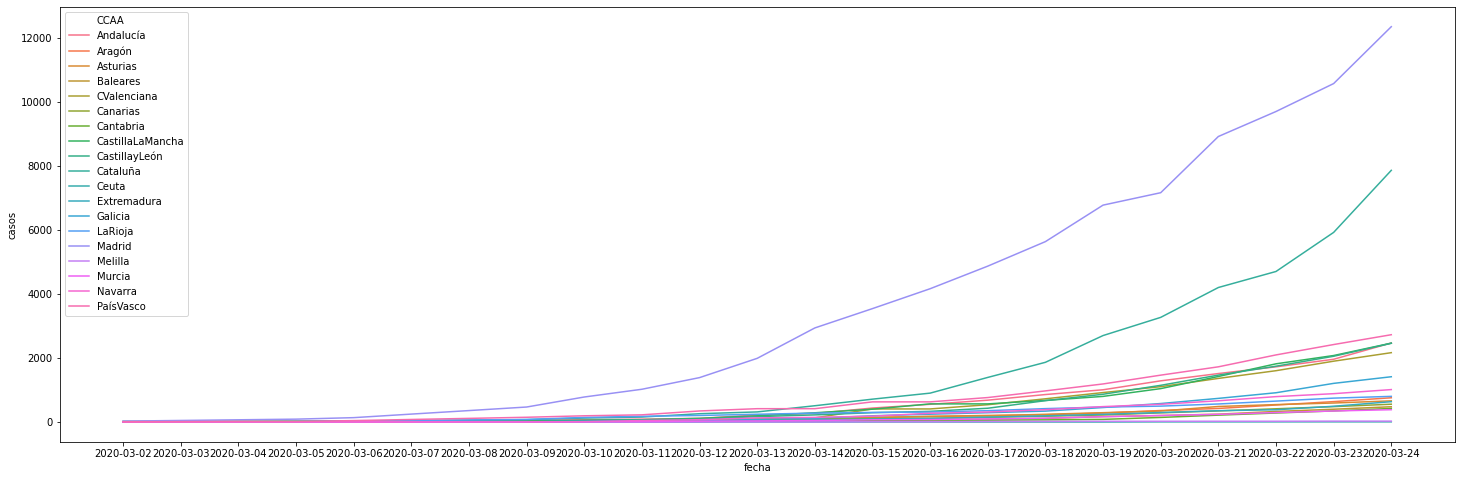

In [3]:
plt.figure(figsize=(25,8))
sns.lineplot(x="fecha", y="casos", hue='CCAA', data=data);

# Nuevos casos

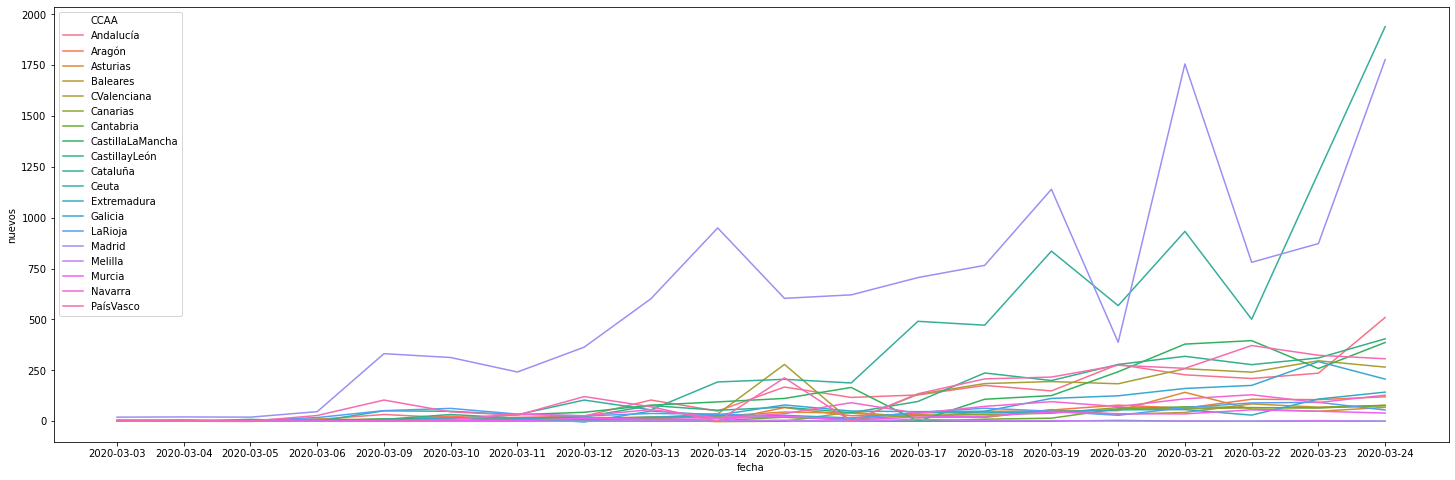

In [4]:
plt.figure(figsize=(25,8))
sns.lineplot(x="fecha", y="nuevos", hue='CCAA', data=data);

# Incidencia Acumulada

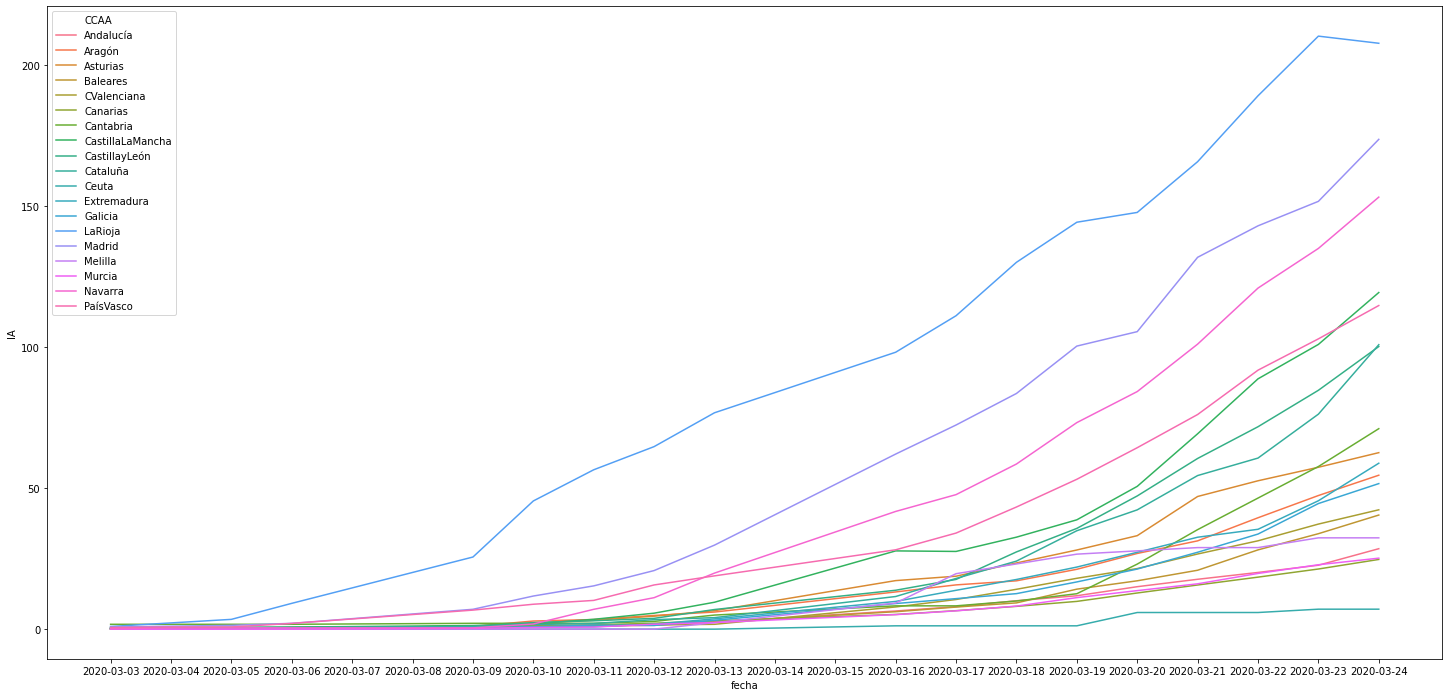

In [5]:
plt.figure(figsize=(25,12))
sns.lineplot(x="fecha", y="IA", hue='CCAA', data=data);

# UCI por CCAA

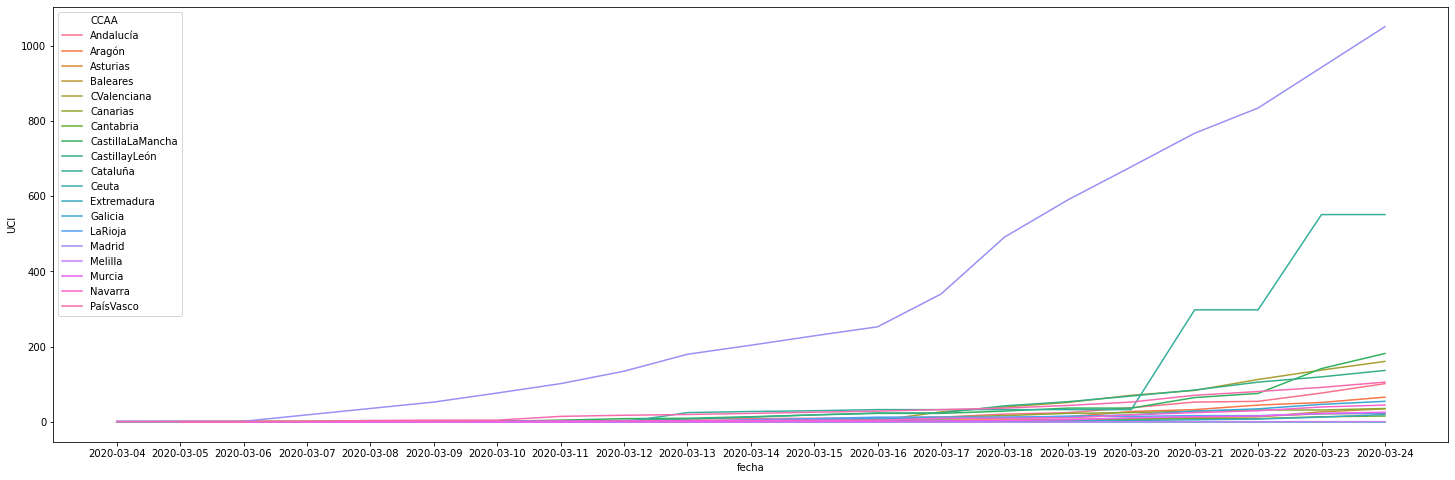

In [6]:
plt.figure(figsize=(25,8))
sns.lineplot(x="fecha", y="UCI", hue='CCAA', data=data);

# Muertes por CCAA

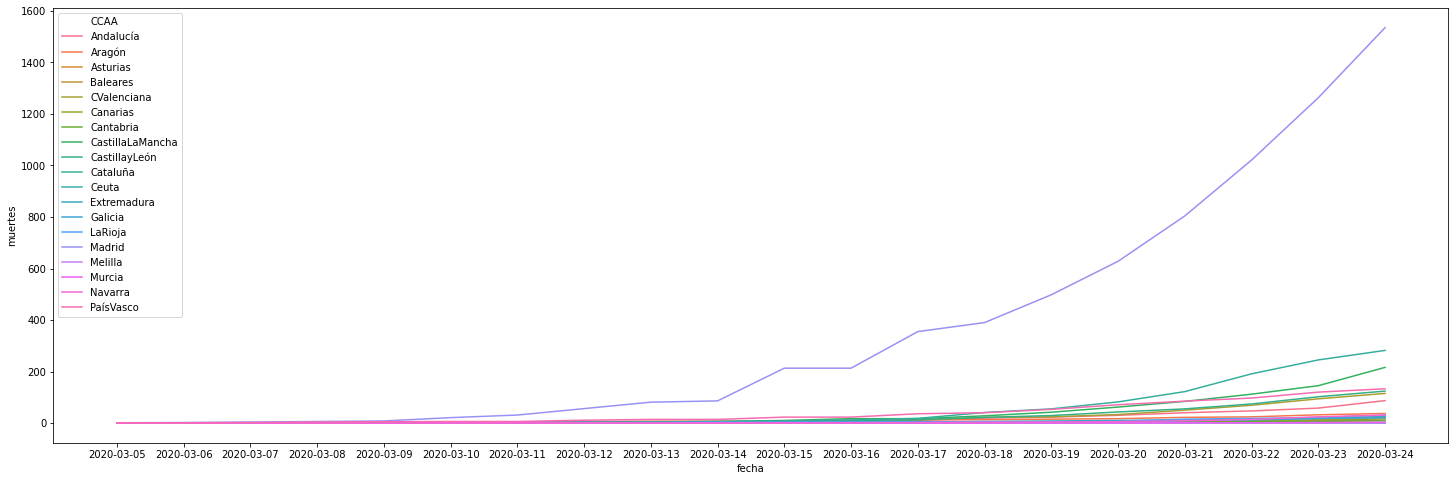

In [7]:
plt.figure(figsize=(25,8))
sns.lineplot(x="fecha", y="muertes", hue='CCAA', data=data);